In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings('ignore')

Load California Housing Dataset

In [ ]:
# Load the California housing dataset
california = fetch_california_housing()

# Extract features
X= california.data

# target variable
y = california.target

# Feature names
feature_names = california.feature_names

# Create a DataFrame for better visualization
df = pd.DataFrame(X, columns=feature_names)
df['MedHouseVal'] = y

# Print First few rows of the dataset:
print(df.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  


In [3]:
# Shape of the dataset
print("Dataset shape:", X.shape)

Dataset shape: (20640, 8)


In [4]:
# Check for missing values
missing_values = df.isnull().sum()
print("\nMissing values in each column:\n", missing_values)


Missing values in each column:
 MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64


The dataset has no missing values

In [5]:
# Check for duplicates
duplicates = df.duplicated().sum()
print("Number of duplicate rows:", duplicates)

Number of duplicate rows: 0


In [6]:
# Check for dataype information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [7]:
# Dataset basic statistics
print(df.describe())

             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude   MedHouseVal  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.692308     32.54000

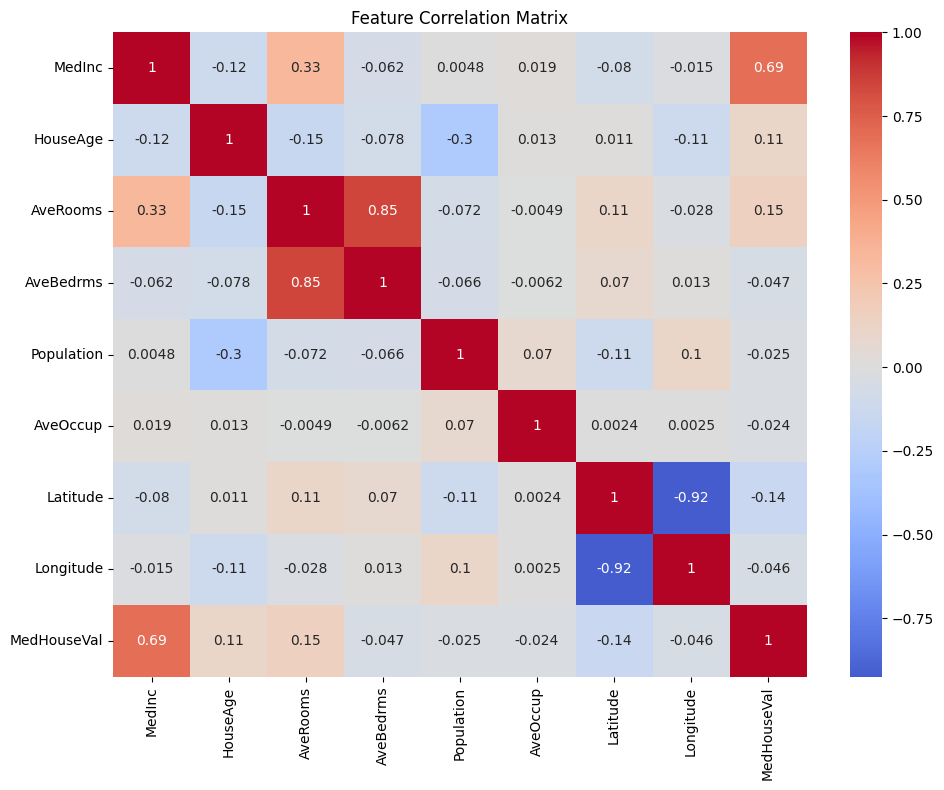

In [8]:
# Check for correlations
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()



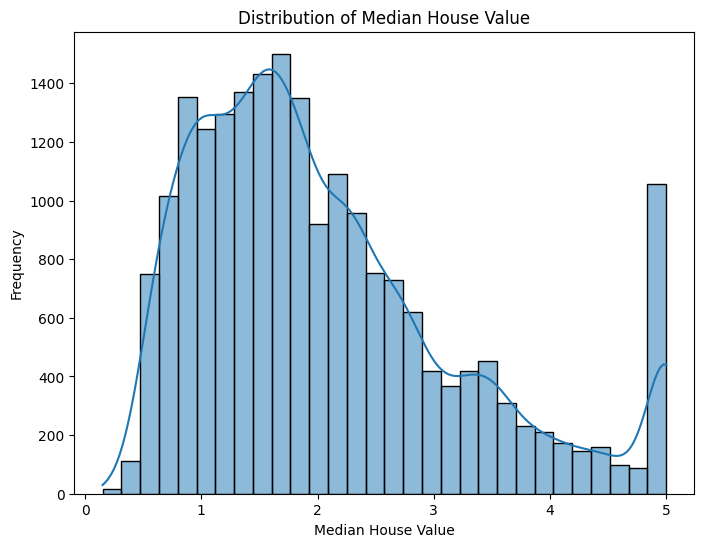

In [9]:
# Visualize the distribution of the target variable
plt.figure(figsize=(8, 6))
sns.histplot(y, kde=True, bins=30)
plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.title('Distribution of Median House Value')
plt.show()

<Figure size 1200x1000 with 0 Axes>

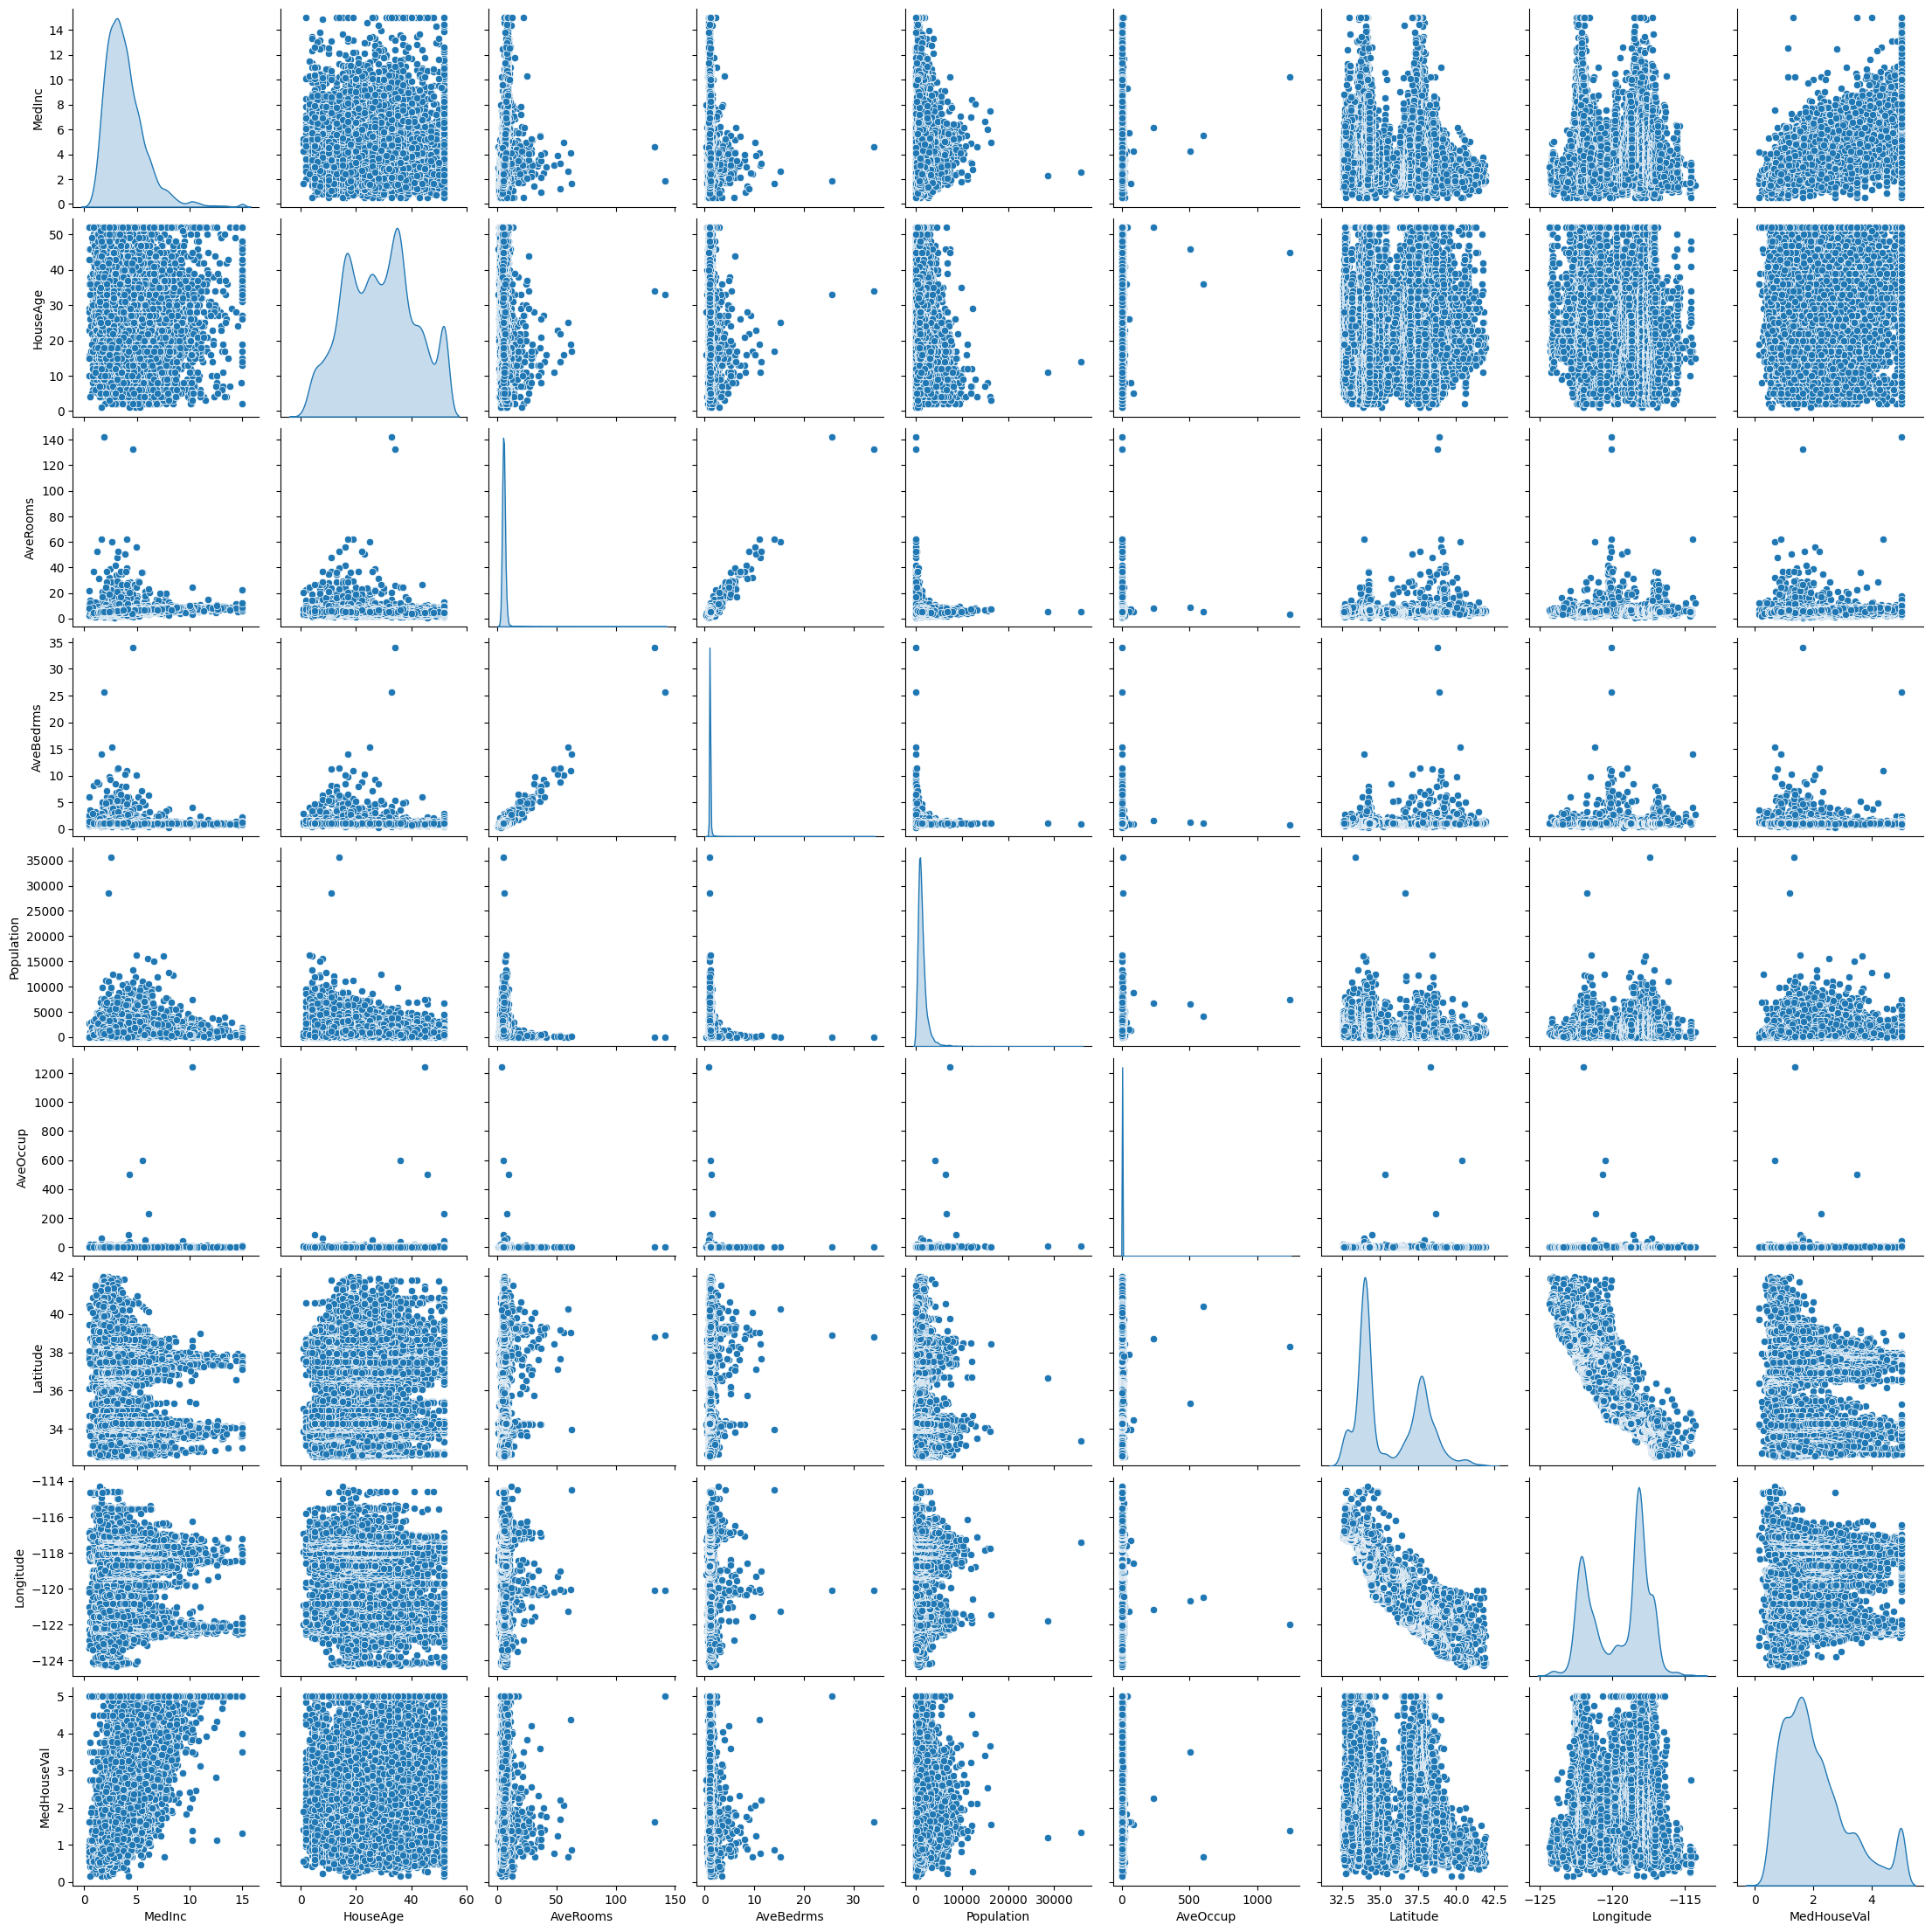

In [10]:
# Pairplot the features to see relationships
plt.figure(figsize=(12, 10))
sns.pairplot(df, diag_kind='kde')
plt.show()

In [11]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")

Training set size: (14448, 8)
Testing set size: (6192, 8)


In [12]:
# Instantiate Linear Regression model
linear_model = LinearRegression()

# Fit to the training data
linear_model.fit(X_train, y_train)

# Make predictions
y_pred_linear = linear_model.predict(X_test)

# Evaluate the model
linear_mse = mean_squared_error(y_test, y_pred_linear)
linear_r2 = r2_score(y_test, y_pred_linear)

print("Linear Regression Results:")
print(f"Mean Squared Error: {linear_mse:.4f}")
print(f"R_Squared Score: {linear_r2:.4f}")

NameError: name 'mean_squared_error' is not defined

In [ ]:
# Create polynomial regression pipeline
poly_degree = 2  # We'll start with degree 2

poly_model = Pipeline([
    ('poly', PolynomialFeatures(degree=poly_degree)),
    ('linear', LinearRegression())
])

# fit to the train the polynomial model
poly_model.fit(X_train, y_train)

# Make predictions
y_pred_poly = poly_model.predict(X_test)

# Evaluate the model
poly_mse = mean_squared_error(y_test, y_pred_poly)
poly_r2 = r2_score(y_test, y_pred_poly)

print("Polynomial Regression Results (Degree 2):")
print(f"Mean Squared Error: {poly_mse:.4f}")
print(f"R_Squared Score: {poly_r2:.4f}")

Polynomial Regression Results (Degree 2):
Mean Squared Error: 0.4550
R_Squared Score: 0.6534


In [ ]:
# Compare performance
comparison = pd.DataFrame({
    'Model': ['Linear Regression', 'Polynomial Regression (Degree 2)'],
    'MSE': [linear_mse, poly_mse],
    'R_Squared': [linear_r2, poly_r2]
})

print("Model Comparison:")
print(comparison)

Model Comparison:
                              Model       MSE  R_Squared
0                 Linear Regression  0.530568   0.595770
1  Polynomial Regression (Degree 2)  0.454972   0.653365


KeyError: 'R²'

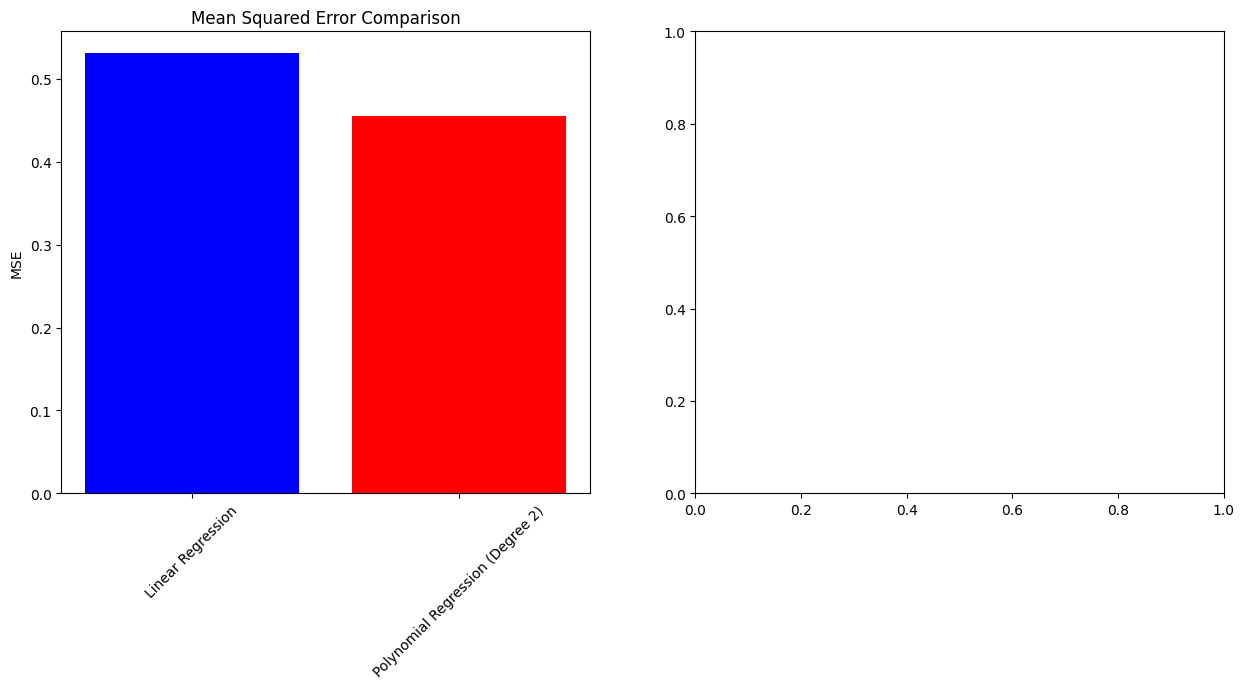

In [ ]:
# Visual comparison
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# MSE comparison
ax[0].bar(comparison['Model'], comparison['MSE'], color=['blue', 'red'])
ax[0].set_title('Mean Squared Error Comparison')
ax[0].set_ylabel('MSE')
ax[0].tick_params(axis='x', rotation=45)

# R² comparison
ax[1].bar(comparison['Model'], comparison['R²'], color=['blue', 'red'])
ax[1].set_title('R² Score Comparison')
ax[1].set_ylabel('R² Score')
ax[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [ ]:
# Experiment with different polynomial degrees
degrees = range(1, 5)
results = []

for degree in degrees:
    if degree == 1:
        # Linear regression
        model = LinearRegression()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    else:
        # Polynomial regression
        model = Pipeline([
            ('poly', PolynomialFeatures(degree=degree)),
            ('linear', LinearRegression())
        ])
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results.append({'Degree': degree, 'MSE': mse, 'R_Squared': r2})

# Create results DataFrame
results_df = pd.DataFrame(results)
print("Performance across different polynomial degrees:")
print(results_df)

Performance across different polynomial degrees:
   Degree        MSE  R_Squared
0       1   0.530568   0.595770
1       2   0.454972   0.653365
2       3   4.040945  -2.078721
3       4  89.641055 -67.295860


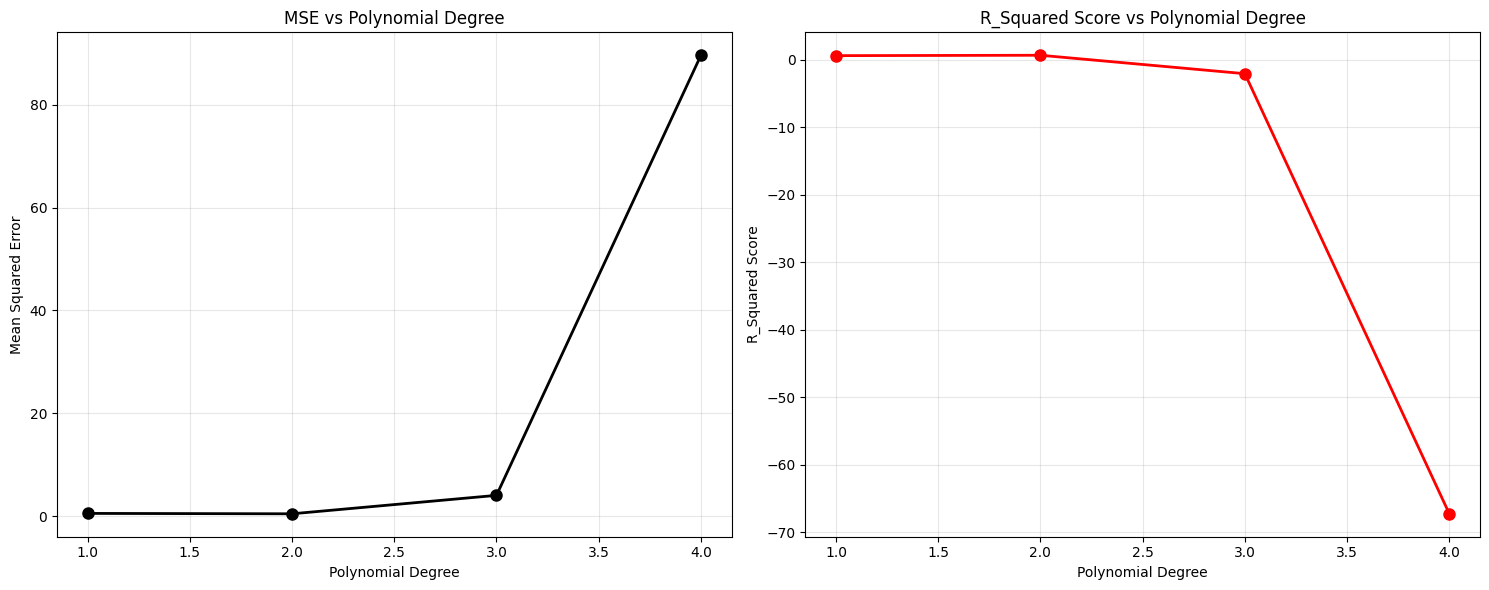

In [ ]:
# Plot results
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# MSE plot
ax[0].plot(results_df['Degree'], results_df['MSE'], marker='o', linewidth=2, markersize=8, color='black')
ax[0].set_xlabel('Polynomial Degree')
ax[0].set_ylabel('Mean Squared Error')
ax[0].set_title('MSE vs Polynomial Degree')
ax[0].grid(True, alpha=0.3)

# R² plot
ax[1].plot(results_df['Degree'], results_df['R_Squared'], marker='o', linewidth=2, markersize=8, color='red')
ax[1].set_xlabel('Polynomial Degree')
ax[1].set_ylabel('R_Squared Score')
ax[1].set_title('R_Squared Score vs Polynomial Degree')
ax[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
# Final comparison
best_degree = results_df.loc[results_df['R_Squared'].idxmax(), 'Degree']
best_r2 = results_df.loc[results_df['R_Squared'].idxmax(), 'R_Squared']

print(f"Best performing model: Polynomial Regression (Degree {int(best_degree)})")
print(f"Best R_Squared score: {best_r2:.4f}")
print(f"Improvement over linear regression: {(best_r2 - linear_r2)*100:.2f}%")

Best performing model: Polynomial Regression (Degree 2)
Best R² score: 0.6534
Improvement over linear regression: 5.76%
